In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.8/949.8 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 109.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 74.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 62.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
!pwd

/content


In [ ]:
!ls -a

 .	   sample_data				     'Screenshot 2025-03-21 at 9.30.02 PM.png'
 ..	  'Screenshot 2025-03-21 at 8.49.59 PM.png'
 .config  'Screenshot 2025-03-21 at 9.29.53 PM.png'


In [ ]:
from transformers import AutoImageProcessor
from transformers.models.detr import DetrForSegmentation
from PIL import Image
import torch

img_proc = AutoImageProcessor.from_pretrained(
    "cmarkea/detr-layout-detection"
)
model = DetrForSegmentation.from_pretrained(
    "cmarkea/detr-layout-detection"
)

img = Image.open("/content/Screenshot 2025-03-21 at 9.30.02 PM.png").convert("RGB")

with torch.inference_mode():
    input_ids = img_proc(img, return_tensors='pt')
    output = model(**input_ids)

threshold=0.4

segmentation_mask = img_proc.post_process_segmentation(
    output,
    threshold=threshold,
    target_sizes=[img.size[::-1]]
)

bbox_pred = img_proc.post_process_object_detection(
    output,
    threshold=threshold,
    target_sizes=[img.size[::-1]]
)


preprocessor_config.json:   0%|          | 0.00/802 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


config.json:   0%|          | 0.00/1.77k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/172M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

`post_process_segmentation` is deprecated and will be removed in v5 of Transformers, please use `post_process_semantic_segmentation`.


In [ ]:
print(bbox_pred)

[{'scores': tensor([0.9992, 0.9993, 0.5821, 0.9994, 0.9989, 0.9985, 0.9972, 0.7840, 0.9797,
        0.7191, 0.9964, 0.9426, 0.9891, 0.7430, 0.9946, 0.9914]), 'labels': tensor([9, 9, 7, 9, 9, 9, 4, 3, 2, 2, 2, 3, 2, 9, 9, 5]), 'boxes': tensor([[ 202.2839,  963.3327,  994.6009, 1130.1594],
        [ 203.4450,  710.6516,  993.6877,  836.8447],
        [ 201.1777,  156.7316,  416.1580,  177.2769],
        [ 203.5697,  326.2719,  994.2386,  475.9984],
        [ 198.3847, 1160.9854,  994.9333, 1397.4930],
        [ 202.8332,  195.8052, 1001.5589,  244.6775],
        [ 594.6161, 1494.5769,  607.0908, 1514.8870],
        [ 203.3405,  871.7152,  684.8503,  892.2354],
        [ 323.3380,  511.4299,  995.2177,  544.3600],
        [ 327.7386,  569.4800,  995.7393,  602.2125],
        [ 484.2053,  274.5336,  995.0947,  300.7203],
        [ 202.7361,  917.9111,  548.2453,  939.2112],
        [ 346.7282,  633.2780, 1001.2054,  681.7492],
        [ 336.0472,  633.0333,  861.4622,  657.1585],
        [

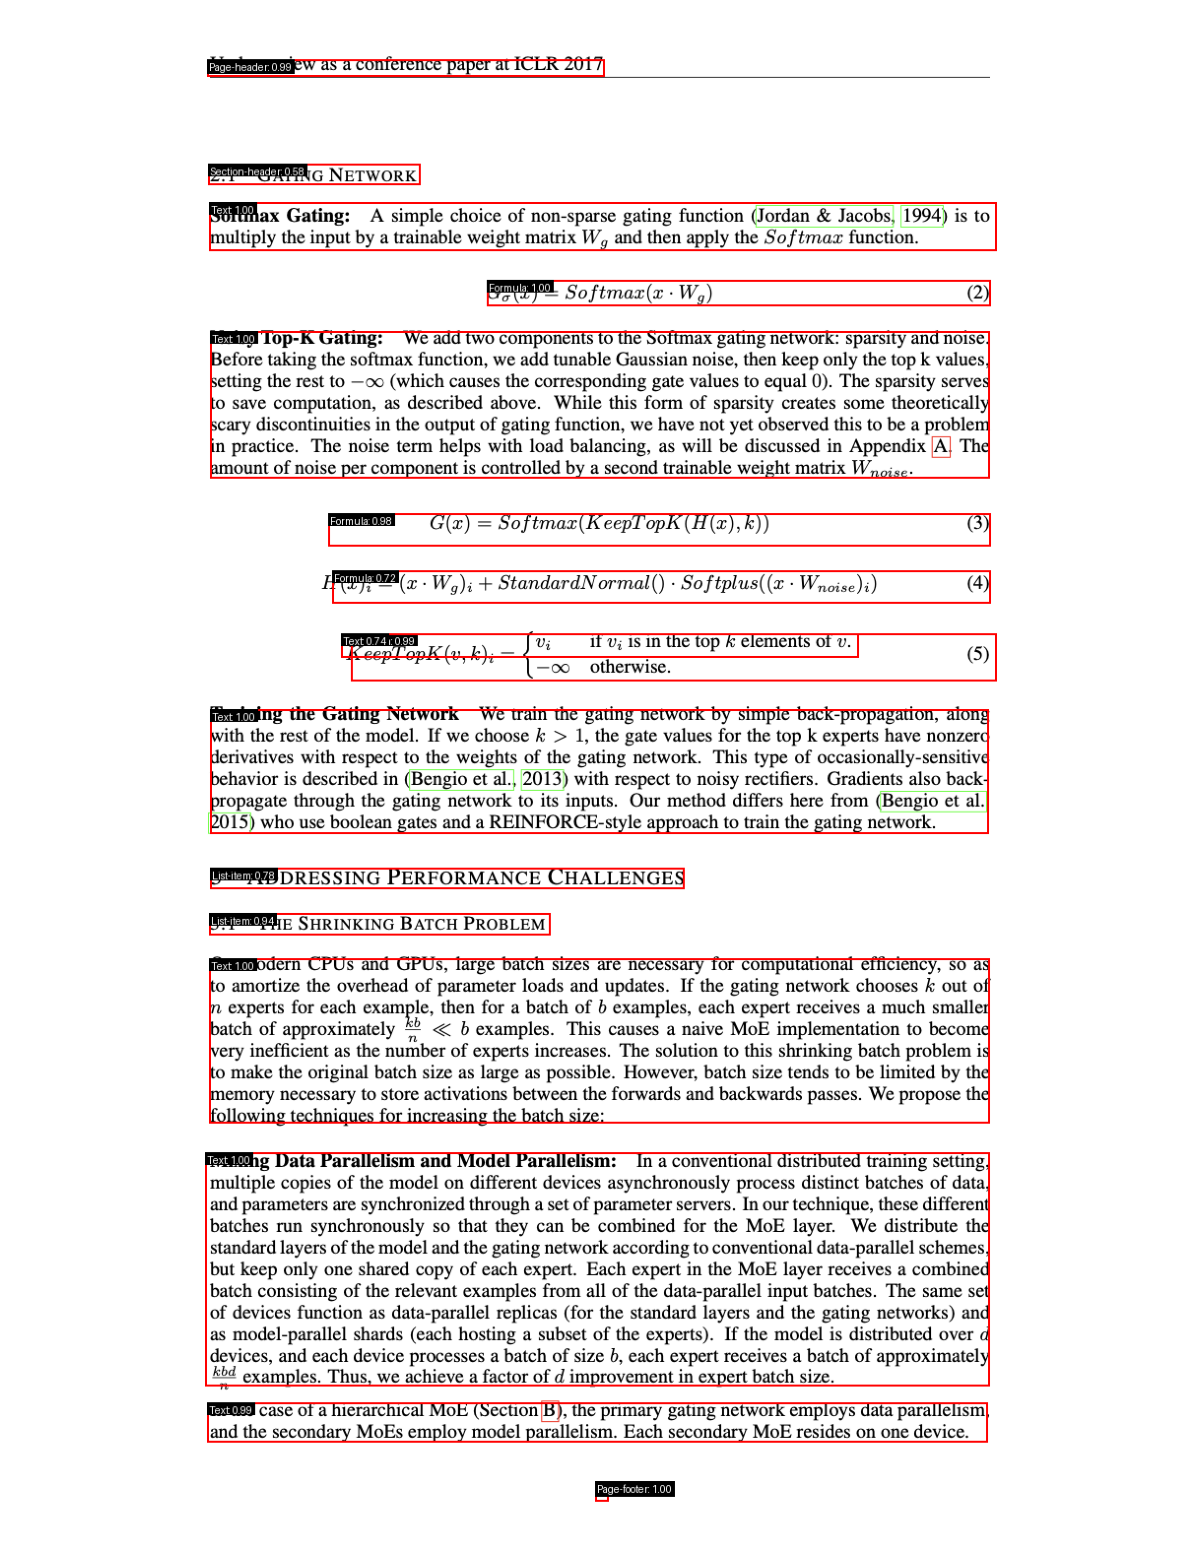

In [ ]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

def plot_yolo_results(image, results, class_id_to_name=None, confidence_threshold=0.5):
    """
    Plot YOLO detection results on an image

    Args:
        image: PIL.Image or numpy array - input image
        results: list of dict - YOLO output results
        class_id_to_name: dict - mapping from class IDs to names
        confidence_threshold: float - minimum confidence to display boxes
    """
    # Create a copy of the image to draw on
    if isinstance(image, Image.Image):
        img = image.copy()
    else:
        img = Image.fromarray(image)

    draw = ImageDraw.Draw(img)

    # Load default font (try Arial first, fallback to default)
    try:
        font = ImageFont.truetype("arial.ttf", 14)
    except IOError:
        font = ImageFont.load_default()

    # Default class ID to name mapping (update with your actual classes)
    if class_id_to_name is None:
        class_id_to_name = {
            0: 'Caption',
            1: 'Footnote',
            2: 'Formula',
            3: 'List-item',
            4: 'Page-footer',
            5: 'Page-header',
            6: 'Picture',
            7: 'Section-header',
            8: 'Table',
            9: 'Text',
            10: 'Title'
        }

    # Extract detections from results
    detections = results[0]  # Assuming single image results
    scores = detections['scores'].cpu().numpy()
    labels = detections['labels'].cpu().numpy()
    boxes = detections['boxes'].cpu().numpy()

    # Plot each detection
    for score, label, box in zip(scores, labels, boxes):
        if score < confidence_threshold:
            continue

        # Convert box coordinates to integers
        xmin, ymin, xmax, ymax = box.astype(int)

        # Draw rectangle
        draw.rectangle([xmin, ymin, xmax, ymax], outline="red", width=2)

        # Create label text
        class_name = class_id_to_name.get(label, f'class{label}')
        label_text = f"{class_name}: {score:.2f}"

        # Calculate text size using textbbox
        bbox = draw.textbbox((2, 2), label_text, font=font)
        text_width = bbox[2] - bbox[0]
        text_height = bbox[3] - bbox[1]

        # Draw text background
        draw.rectangle(
            [xmin, ymin, xmin + text_width + 4, ymin + text_height + 4],
            fill="black"
        )

        # Draw text
        draw.text(
            (xmin + 2, ymin + 2),  # Add small padding
            label_text,
            fill="white",
            font=font
        )

    # Display image
    plt.figure(figsize=(25, 20))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Example usage:
plot_yolo_results(img, bbox_pred)

In [ ]:
!pip install pytesseract pillow
# Install Tesseract OCR engine: https://github.com/UB-Mannheim/tesseract/wiki

In [ ]:
# Run these commands in order
!sudo apt install tesseract-ocr
!sudo apt install libtesseract-dev
!pip install pytesseract

# Install language data (English + common languages)
!sudo apt-get install tesseract-ocr-eng tesseract-ocr-fra tesseract-ocr-spa tesseract-ocr-deu

# Verify installation
!tesseract --version

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 29 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (4,571 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [ ]:
import json
import pytesseract
from PIL import Image
import torch

def extract_all_classes_ordered(image_path, detection_results, model, output_json="all_classes_output.json"):
    """
    Extract text from all detected regions in original prediction order
    """
    # Load the original image
    img = Image.open(image_path).convert("RGB")

    # Prepare data structure
    extracted_data = []

    # Extract detection components
    detections = detection_results[0]
    scores = detections['scores'].cpu().numpy()
    labels = detections['labels'].cpu().numpy()
    boxes = detections['boxes'].cpu().numpy()

    # Process each detection in original order
    for idx, (score, label, box) in enumerate(zip(scores, labels, boxes)):
        try:
            # Convert box coordinates to integers
            xmin, ymin, xmax, ymax = box.astype(int)

            # Crop the region of interest
            region = img.crop((xmin, ymin, xmax, ymax))

            # Perform OCR with Tesseract
            text = pytesseract.image_to_string(
                region,
                config='--psm 6 --oem 3'
            ).strip()

            # Get class name from model config
            class_name = model.config.id2label.get(int(label), f"unknown_{int(label)}")

            extracted_data.append({
                "order": idx + 1,
                "class_id": int(label),
                "class_name": class_name,
                "confidence": float(score),
                "bbox": [int(xmin), int(ymin), int(xmax), int(ymax)],
                "text": text
            })

        except Exception as e:
            print(f"Error processing detection {idx}: {str(e)}")
            extracted_data.append({
                "order": idx + 1,
                "error": str(e)
            })

    # Save to JSON
    with open(output_json, 'w') as f:
        json.dump(extracted_data, f, indent=2, ensure_ascii=False)

    return extracted_data

# Usage with your existing code
if __name__ == "__main__":
    # Your existing detection code
    img_proc = AutoImageProcessor.from_pretrained("cmarkea/detr-layout-detection")
    model = DetrForSegmentation.from_pretrained("cmarkea/detr-layout-detection")

    img_path = "/content/Screenshot 2025-03-21 at 9.30.02 PM.png"
    img = Image.open(img_path).convert("RGB")

    with torch.inference_mode():
        inputs = img_proc(img, return_tensors="pt")
        outputs = model(**inputs)

    threshold = 0.4
    bbox_pred = img_proc.post_process_object_detection(
        outputs,
        threshold=threshold,
        target_sizes=[img.size[::-1]]
    )

    # Extract all classes in detection order
    results = extract_all_classes_ordered(
        image_path=img_path,
        detection_results=bbox_pred,
        model=model,
        output_json="ordered_classes_output.json"
    )

    print(f"Processed {len(results)} detections in original order")

Processed 16 detections in original order


In [ ]:
results

[{'order': 1,
  'class_id': 9,
  'class_name': 'Text',
  'confidence': 0.999213457107544,
  'bbox': [202, 963, 994, 1130],
  'text': 'Un modern CFUs and GFUs, large batch sizes are necessary lor computational efficiency, so as\nto amortize the overhead of parameter loads and updates. If the gating network chooses k out of\nn experts for each example, then for a batch of b examples, each expert receives a much smaller\nbatch of approximately ©” < b examples. This causes a naive MoE implementation to become\nvery inefficient as the number of experts increases. The solution to this shrinking batch problem is\nto make the original batch size as large as possible. However, batch size tends to be limited by the\nmemory necessary to store activations between the forwards and backwards passes. We propose the\nfollowing techniques for increasing the batch size:'},
 {'order': 2,
  'class_id': 9,
  'class_name': 'Text',
  'confidence': 0.999319314956665,
  'bbox': [203, 710, 993, 836],
  'text': 

In [ ]:
import json
import pytesseract
import torch
from PIL import Image
import os

def process_and_order_detections(image_path, detection_results, model, output_json="ordered_output.json"):
    # Create output directory for title images
    os.makedirs("title_images", exist_ok=True)

    img = Image.open(image_path).convert("RGB")
    extracted_data = []

    detections = detection_results[0]
    scores = detections['scores'].cpu().numpy()
    labels = detections['labels'].cpu().numpy()
    boxes = detections['boxes'].cpu().numpy()

    # First pass: Extract all data and save title images
    for idx, (score, label, box) in enumerate(zip(scores, labels, boxes)):
        entry = {
            "class_id": int(label),
            "class_name": model.config.id2label.get(int(label), f"unknown_{int(label)}"),
            "confidence": float(score),
            "bbox": box.astype(int).tolist(),
            "text": "",
            "image_path": None
        }

        xmin, ymin, xmax, ymax = entry["bbox"]

        try:
            region = img.crop((xmin, ymin, xmax, ymax))

            # Special handling for titles (class 2)
            if entry["class_id"] == 2:
                img_path = f"title_images/title_{len(extracted_data)+1}.png"
                region.save(img_path)
                entry["image_path"] = img_path
                entry["text"] = pytesseract.image_to_string(region, config='--psm 6 --oem 3').strip()
            else:
                entry["text"] = pytesseract.image_to_string(region, config='--psm 6 --oem 3').strip()

        except Exception as e:
            entry["error"] = str(e)

        extracted_data.append(entry)

    # Second pass: Sort by vertical position (ymin)
    sorted_data = sorted(extracted_data, key=lambda x: x["bbox"][1])

    # Add reading order sequence
    for order, item in enumerate(sorted_data, 1):
        item["reading_order"] = order

    # Save final ordered JSON
    with open(output_json, 'w') as f:
        json.dump(sorted_data, f, indent=2, ensure_ascii=False)

    return sorted_data

# Usage with your existing detection code
if __name__ == "__main__":
    # Your existing detection setup
    img_proc = AutoImageProcessor.from_pretrained("cmarkea/detr-layout-detection")
    model = DetrForSegmentation.from_pretrained("cmarkea/detr-layout-detection")

    img_path = "/content/Screenshot 2025-03-21 at 9.30.02 PM.png"
    img = Image.open(img_path).convert("RGB")

    with torch.inference_mode():
        inputs = img_proc(img, return_tensors="pt")
        outputs = model(**inputs)

    bbox_pred = img_proc.post_process_object_detection(
        outputs,
        threshold=0.4,
        target_sizes=[Image.open(img_path).size[::-1]]
    )

    # Process and order results
    ordered_results = process_and_order_detections(
        image_path=img_path,
        detection_results=bbox_pred,
        model=model
    )

    print(f"Generated ordered output with {len(ordered_results)} elements")

Generated ordered output with 16 elements


In [ ]:
ordered_results

[{'class_id': 5,
  'class_name': 'Page-header',
  'confidence': 0.9913946986198425,
  'bbox': [200, 50, 603, 67],
  'text': 'Under review as a conference paper at ItULIK 2U1/',
  'image_path': None,
  'reading_order': 1},
 {'class_id': 7,
  'class_name': 'Section-header',
  'confidence': 0.5821285247802734,
  'bbox': [201, 156, 416, 177],
  'text': '2.1 GATING NETWORK',
  'image_path': None,
  'reading_order': 2},
 {'class_id': 9,
  'class_name': 'Text',
  'confidence': 0.9985458850860596,
  'bbox': [202, 195, 1001, 244],
  'text': 'Softmax Gating: A simple choice of non-sparse gating function (Jordan & Jacobs, |1994) is to\nmultiply the input by a trainable weight matrix W, and then apply the Softmac function.',
  'image_path': None,
  'reading_order': 3},
 {'class_id': 2,
  'class_name': 'Formula',
  'confidence': 0.9963963627815247,
  'bbox': [484, 274, 995, 300],
  'text': 'G(x) = Softmaz(z - W,) (2)',
  'image_path': 'title_images/title_11.png',
  'reading_order': 4},
 {'class_id'

In [ ]:
!pip install pymupdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 54.7 MB/s eta 0:00:00


In [ ]:
#This code saves the text in json in order and for formulas, it saves them as images

import json
import pytesseract
import torch
import fitz  # PyMuPDF
from PIL import Image
import os
import io
from transformers import AutoImageProcessor, DetrForSegmentation

def process_page(image, model, img_proc, page_num):
    """Process a single page image"""
    with torch.inference_mode():
        inputs = img_proc(images=image, return_tensors="pt")
        outputs = model(**inputs)

    bbox_pred = img_proc.post_process_object_detection(
        outputs,
        threshold=0.4,
        target_sizes=[image.size[::-1]]
    )

    return process_page_detections(image, bbox_pred, model, page_num)

def process_page_detections(image, detection_results, model, page_num):
    """Process detections for a single page"""
    extracted_data = []

    detections = detection_results[0]
    scores = detections['scores'].cpu().numpy()
    labels = detections['labels'].cpu().numpy()
    boxes = detections['boxes'].cpu().numpy()

    for score, label, box in zip(scores, labels, boxes):
        entry = {
            "page": page_num + 1,  # 1-based numbering
            "class_id": int(label),
            "class_name": model.config.id2label.get(int(label), f"unknown_{int(label)}"),
            "confidence": float(score),
            "bbox": box.astype(int).tolist(),
            "text": "",
        }

        xmin, ymin, xmax, ymax = entry["bbox"]

        try:
            region = image.crop((xmin, ymin, xmax, ymax))
            entry["text"] = pytesseract.image_to_string(region, config='--psm 6 --oem 3').strip()

            # Save title regions (class 2)
            if entry["class_id"] == 2:
                os.makedirs("title_images", exist_ok=True)
                img_path = f"title_images/page_{page_num+1}_title_{len(extracted_data)+1}.png"
                region.save(img_path)
                entry["image_path"] = img_path

        except Exception as e:
            entry["error"] = str(e)

        extracted_data.append(entry)

    # Sort by vertical position within page
    sorted_data = sorted(extracted_data, key=lambda x: x["bbox"][1])

    # Add reading order within page
    for order, item in enumerate(sorted_data, 1):
        item["page_order"] = order

    return sorted_data

def pdf_to_json(pdf_path, output_json="pdf_output.json"):
    """Main function to process PDF and save results"""
    # Initialize model and processor
    img_proc = AutoImageProcessor.from_pretrained("cmarkea/detr-layout-detection")
    model = DetrForSegmentation.from_pretrained("cmarkea/detr-layout-detection")

    all_results = []

    # Open PDF file
    pdf_document = fitz.open(pdf_path)

    for page_num in range(len(pdf_document)):
        # Convert PDF page to image
        page = pdf_document.load_page(page_num)
        pix = page.get_pixmap(dpi=300)  # High resolution for OCR

        # Convert to PIL Image
        image = Image.open(io.BytesIO(pix.tobytes("png")))

        # Process the page
        page_results = process_page(image, model, img_proc, page_num)
        all_results.extend(page_results)

    # Save complete results
    with open(output_json, 'w') as f:
        json.dump(all_results, f, indent=2, ensure_ascii=False)

    return all_results

if __name__ == "__main__":
    # Process PDF and save results
    results = pdf_to_json(
        pdf_path="/content/1701.06538v1.pdf",
        output_json="document_analysis.json"
    )
    print(f"Processed {len(results)} elements across PDF pages")

Processed 286 elements across PDF pages


In [ ]:
#keeps pictures and formulas as images. Improvement: Merge caption to the image.
import json
import pytesseract
import torch
import fitz  # PyMuPDF
from PIL import Image
import os
import io
from transformers import AutoImageProcessor, DetrForSegmentation

def process_page(image, model, img_proc, page_num):
    """Process a single page image"""
    with torch.inference_mode():
        inputs = img_proc(images=image, return_tensors="pt")
        outputs = model(**inputs)

    bbox_pred = img_proc.post_process_object_detection(
        outputs,
        threshold=0.4,
        target_sizes=[image.size[::-1]]
    )

    return process_page_detections(image, bbox_pred, model, page_num)

def process_page_detections(image, detection_results, model, page_num):
    """Process detections for a single page"""
    extracted_data = []

    detections = detection_results[0]
    scores = detections['scores'].cpu().numpy()
    labels = detections['labels'].cpu().numpy()
    boxes = detections['boxes'].cpu().numpy()

    for score, label, box in zip(scores, labels, boxes):
        entry = {
            "page": page_num + 1,  # 1-based numbering
            "class_id": int(label),
            "class_name": model.config.id2label.get(int(label), f"unknown_{int(label)}"),
            "confidence": float(score),
            "bbox": box.astype(int).tolist(),
            "text": "",
        }

        xmin, ymin, xmax, ymax = entry["bbox"]

        try:
            region = image.crop((xmin, ymin, xmax, ymax))
            entry["text"] = pytesseract.image_to_string(region, config='--psm 6 --oem 3').strip()

            # Save images for specific classes
            if entry["class_id"] in [2, 6]:  # Handle both classes
                class_type = "title" if entry["class_id"] == 2 else "class6"
                dir_path = f"{class_type}_images"
                os.makedirs(dir_path, exist_ok=True)

                img_path = f"{dir_path}/page_{page_num+1}_{class_type}_{len(extracted_data)+1}.png"
                region.save(img_path)
                entry["image_path"] = img_path

        except Exception as e:
            entry["error"] = str(e)

        extracted_data.append(entry)

    # Sort by vertical position within page
    sorted_data = sorted(extracted_data, key=lambda x: x["bbox"][1])

    # Add reading order within page
    for order, item in enumerate(sorted_data, 1):
        item["page_order"] = order

    return sorted_data

def pdf_to_json(pdf_path, output_json="pdf_output.json"):
    """Main function to process PDF and save results"""
    # Initialize model and processor
    img_proc = AutoImageProcessor.from_pretrained("cmarkea/detr-layout-detection")
    model = DetrForSegmentation.from_pretrained("cmarkea/detr-layout-detection")

    all_results = []

    # Open PDF file
    pdf_document = fitz.open(pdf_path)

    for page_num in range(len(pdf_document)):
        # Convert PDF page to image
        page = pdf_document.load_page(page_num)
        pix = page.get_pixmap(dpi=300)  # High resolution for OCR

        # Convert to PIL Image
        image = Image.open(io.BytesIO(pix.tobytes("png")))

        # Process the page
        page_results = process_page(image, model, img_proc, page_num)
        all_results.extend(page_results)

    # Save complete results
    with open(output_json, 'w') as f:
        json.dump(all_results, f, indent=2, ensure_ascii=False)

    return all_results

if __name__ == "__main__":
    # Process PDF and save results
    results = pdf_to_json(
        pdf_path="/content/1701.06538v1.pdf",
        output_json="document_analysis.json"
    )
    print(f"Processed {len(results)} elements across PDF pages")

Processed 286 elements across PDF pages


In [ ]:
import json
import pytesseract
import torch
import fitz  # PyMuPDF
from PIL import Image
import os
import io
from transformers import AutoImageProcessor, DetrForSegmentation

def process_page(image, model, img_proc, page_num):
    """Process a single page image"""
    with torch.inference_mode():
        inputs = img_proc(images=image, return_tensors="pt")
        outputs = model(**inputs)

    bbox_pred = img_proc.post_process_object_detection(
        outputs,
        threshold=0.4,
        target_sizes=[image.size[::-1]]
    )

    return process_page_detections(image, bbox_pred, model, page_num)

def merge_text_entries(text_entries):
    """Merge multiple text entries into one"""
    merged_text = ' '.join([e['text'] for e in text_entries])
    return {
        'page': text_entries[0]['page'],
        'class_id': 9,
        'class_name': 'text',
        'text': merged_text,
        'merged_count': len(text_entries),
        'merged_from': [{'bbox': e['bbox'], 'confidence': e['confidence']} for e in text_entries]
    }

def process_page_detections(image, detection_results, model, page_num):
    """Process detections for a single page"""
    extracted_data = []

    detections = detection_results[0]
    scores = detections['scores'].cpu().numpy()
    labels = detections['labels'].cpu().numpy()
    boxes = detections['boxes'].cpu().numpy()

    for score, label, box in zip(scores, labels, boxes):
        entry = {
            "page": page_num + 1,  # 1-based numbering
            "class_id": int(label),
            "class_name": model.config.id2label.get(int(label), f"unknown_{int(label)}"),
            "confidence": float(score),
            "bbox": box.astype(int).tolist(),
            "text": "",
        }

        xmin, ymin, xmax, ymax = entry["bbox"]

        try:
            region = image.crop((xmin, ymin, xmax, ymax))
            entry["text"] = pytesseract.image_to_string(region, config='--psm 6 --oem 3').strip()

            # Save images for specific classes
            if entry["class_id"] in [2, 6]:  # Handle both classes
                class_type = model.config.id2label[entry["class_id"]].lower()
                dir_path = f"{class_type}_images"
                os.makedirs(dir_path, exist_ok=True)

                img_path = f"{dir_path}/page_{page_num+1}_{class_type}_{len(extracted_data)+1}.png"
                region.save(img_path)
                entry["image_path"] = img_path

        except Exception as e:
            entry["error"] = str(e)

        extracted_data.append(entry)

    # Sort by vertical position within page
    sorted_data = sorted(extracted_data, key=lambda x: x["bbox"][1])

    # Merge continuous text blocks (class 9)
    merged_data = []
    current_text_group = []
    for entry in sorted_data:
        if entry['class_name'] == 'text' and entry['class_id'] == 9:
            current_text_group.append(entry)
        else:
            if current_text_group:
                merged_data.append(merge_text_entries(current_text_group))
                current_text_group = []
            merged_data.append(entry)
    if current_text_group:
        merged_data.append(merge_text_entries(current_text_group))

    # Associate captions with images
    final_data = []
    caption_buffer = None
    for idx, entry in enumerate(merged_data):
        if caption_buffer:
            if entry['class_name'] == 'Caption':
                final_data[-1]['caption'] = entry['text']
            else:
                final_data.append(caption_buffer)
            caption_buffer = None

        if entry['class_name'] == 'Picture':
            # Look ahead for caption
            if idx+1 < len(merged_data) and merged_data[idx+1]['class_name'] == 'Caption':
                entry['caption'] = merged_data[idx+1]['text']
                caption_buffer = merged_data[idx+1]
            final_data.append(entry)
        else:
            final_data.append(entry)

    # Clean up merged text entries
    for entry in final_data:
        if 'merged_text' in entry:
            entry['text'] = entry.pop('merged_text')
            del entry['confidence']
            del entry['bbox']

    return final_data

def pdf_to_json(pdf_path, output_json="pdf_output.json"):
    """Main function to process PDF and save results"""
    # Initialize model and processor
    img_proc = AutoImageProcessor.from_pretrained("cmarkea/detr-layout-detection")
    model = DetrForSegmentation.from_pretrained("cmarkea/detr-layout-detection")

    all_results = []

    # Open PDF file
    pdf_document = fitz.open(pdf_path)

    for page_num in range(len(pdf_document)):
        # Convert PDF page to image
        page = pdf_document.load_page(page_num)
        pix = page.get_pixmap(dpi=300)  # High resolution for OCR

        # Convert to PIL Image
        image = Image.open(io.BytesIO(pix.tobytes("png")))

        # Process the page
        page_results = process_page(image, model, img_proc, page_num)
        all_results.extend(page_results)

    # Save complete results
    # In the JSON output code, modify the dump line to:
    with open(output_json, 'w') as f:
        json.dump(all_results, f, indent=2, ensure_ascii=False,
                default=lambda o: o.__dict__ if hasattr(o, '__dict__') else str(o))

    return all_results

if __name__ == "__main__":
    # Process PDF and save results
    results = pdf_to_json(
        pdf_path="/content/1701.06538v1.pdf",
        output_json="document_analysis.json"
    )
    print(f"Processed {len(results)} elements across PDF pages")

preprocessor_config.json:   0%|          | 0.00/802 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


config.json:   0%|          | 0.00/1.77k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/172M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

Processed 286 elements across PDF pages


In [1]:
!pip install mistralai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.7/288.7 kB 7.6 MB/s eta 0:00:00


OCRResponse(pages=[OCRPageObject(index=0, markdown='# OUTRAGEOUSLY LARGE NEURAL NETWORKS: The Sparsely-Gated Mixture-of-Experts Layer \n\nNoam Shazeer ${ }^{1}$, Azalia Mirhoseini ${ }^{* 11}$, Krzysztof Maziarz ${ }^{* 2}$, Andy Davis ${ }^{1}$, Quoc Le ${ }^{1}$, Geoffrey Hinton ${ }^{1}$ and Jeff Dean ${ }^{1}$<br>${ }^{1}$ Google Brain, \\{noam,azalia,andydavis,qvl,geoffhinton,jeff\\}@google.com<br>${ }^{2}$ Jagiellonian University, Cracow, krzysztof.maziarz@student.uj.edu.pl\n\n\n#### Abstract\n\nThe capacity of a neural network to absorb information is limited by its number of parameters. Conditional computation, where parts of the network are active on a per-example basis, has been proposed in theory as a way of dramatically increasing model capacity without a proportional increase in computation. In practice, however, there are significant algorithmic and performance challenges. In this work, we address these challenges and finally realize the promise of conditional computation
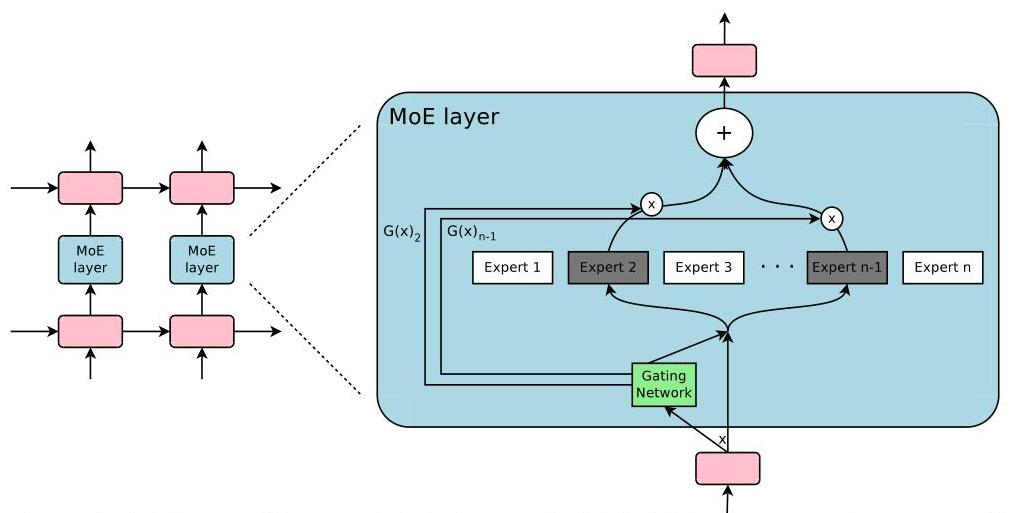
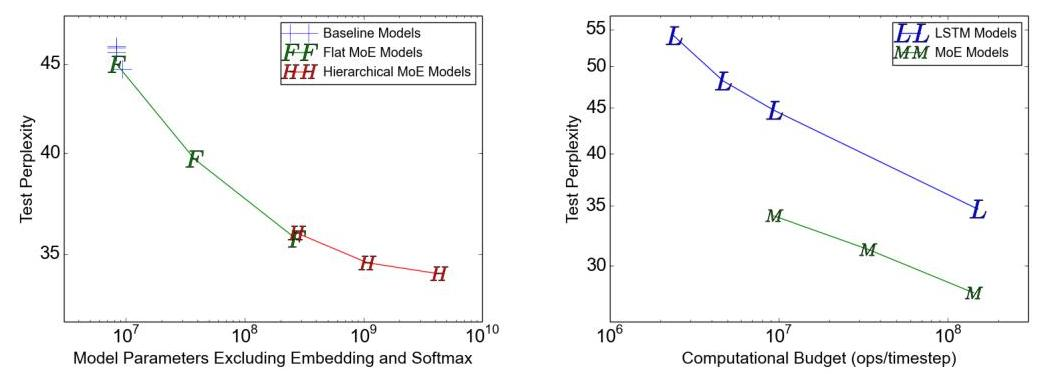
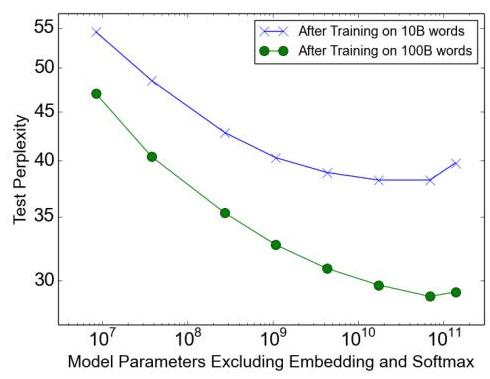
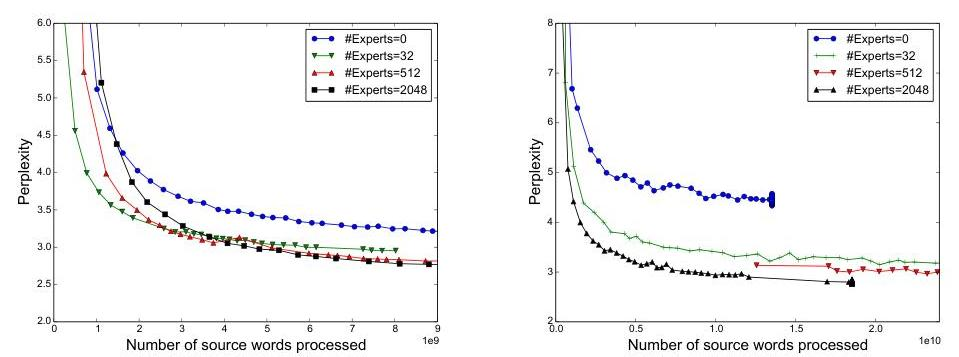

In [2]:
import os
from mistralai import Mistral

api_key = "9E4TdAUbDGlA5imc7zUeqfCqFxO5kfEm"
client = Mistral(api_key=api_key)

ocr_response = client.ocr.process(
    model="mistral-ocr-latest",
    document={
        "type": "document_url",
        "document_url": "https://arxiv.org/pdf/1701.06538"
    },
    include_image_base64=True
)

ocr_response

OCR data successfully saved to ocr_results.json


{'pages': [{'index': 0,
   'markdown': '# OUTRAGEOUSLY LARGE NEURAL NETWORKS: The Sparsely-Gated Mixture-of-Experts Layer \n\nNoam Shazeer ${ }^{1}$, Azalia Mirhoseini ${ }^{* 11}$, Krzysztof Maziarz ${ }^{* 2}$, Andy Davis ${ }^{1}$, Quoc Le ${ }^{1}$, Geoffrey Hinton ${ }^{1}$ and Jeff Dean ${ }^{1}$<br>${ }^{1}$ Google Brain, \\{noam,azalia,andydavis,qvl,geoffhinton,jeff\\}@google.com<br>${ }^{2}$ Jagiellonian University, Cracow, krzysztof.maziarz@student.uj.edu.pl\n\n\n#### Abstract\n\nThe capacity of a neural network to absorb information is limited by its number of parameters. Conditional computation, where parts of the network are active on a per-example basis, has been proposed in theory as a way of dramatically increasing model capacity without a proportional increase in computation. In practice, however, there are significant algorithmic and performance challenges. In this work, we address these challenges and finally realize the promise of conditional computation, achieving 
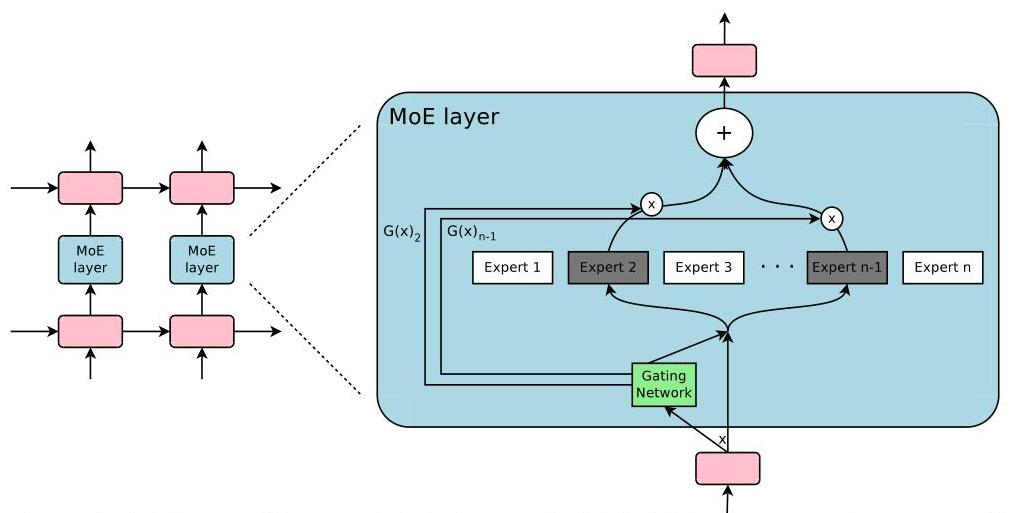
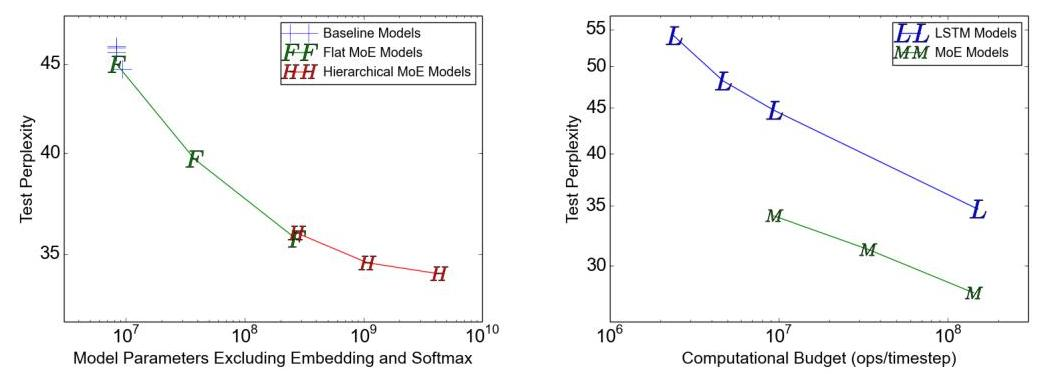
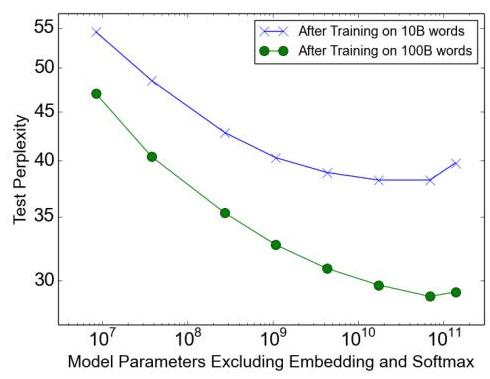
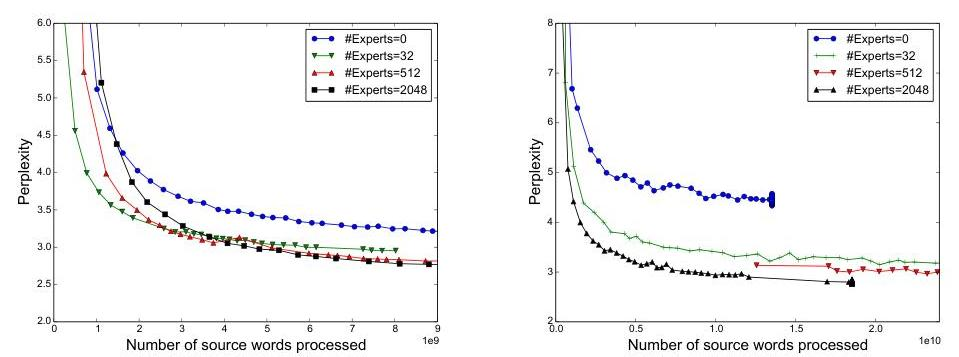

In [3]:
import json

def save_ocr_data_to_json(ocr_pages, output_file="ocr_data.json"):
    """
    Convert OCR page objects to JSON and save to a file

    Args:
        ocr_pages: List of OCR page objects
        output_file: Filename to save the JSON data
    """
    # Create dictionary structure suitable for JSON
    ocr_data = {"pages": []}

    for page in ocr_pages:
        # Extract page information
        page_dict = {
            "index": page.index,
            "markdown": page.markdown,
            "images": [],
            "dimensions": {
                "dpi": page.dimensions.dpi,
                "height": page.dimensions.height,
                "width": page.dimensions.width
            }
        }

        # Extract image information if available
        if hasattr(page, "images") and page.images:
            for img in page.images:
                img_dict = {
                    "id": img.id,
                    "top_left_x": img.top_left_x,
                    "top_left_y": img.top_left_y,
                    "bottom_right_x": img.bottom_right_x,
                    "bottom_right_y": img.bottom_right_y,
                    "image_base64": img.image_base64
                }
                page_dict["images"].append(img_dict)

        ocr_data["pages"].append(page_dict)

    # Write to JSON file
    with open(output_file, 'w', encoding='utf-8') as f:
        json.dump(ocr_data, f, indent=2)

    print(f"OCR data successfully saved to {output_file}")
    return ocr_data

# Example usage:
save_ocr_data_to_json(ocr_response.pages, "ocr_results.json")


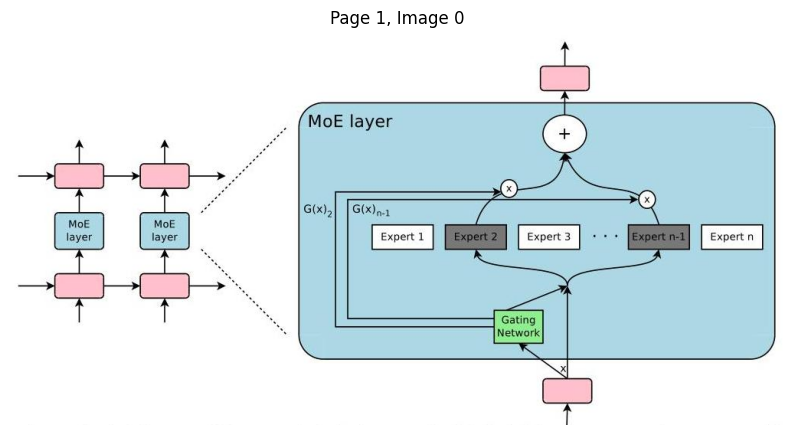

Displayed image from Page 1, Image 0


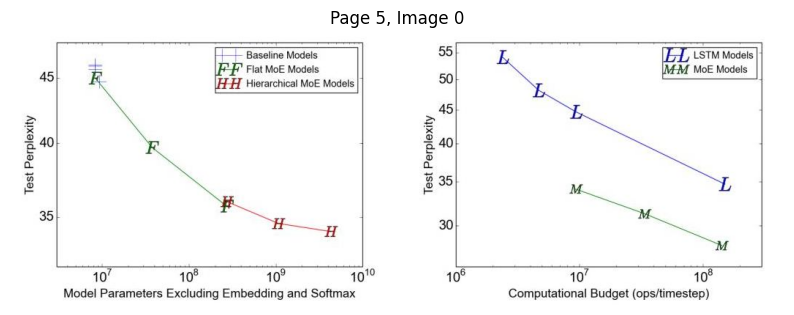

Displayed image from Page 5, Image 0


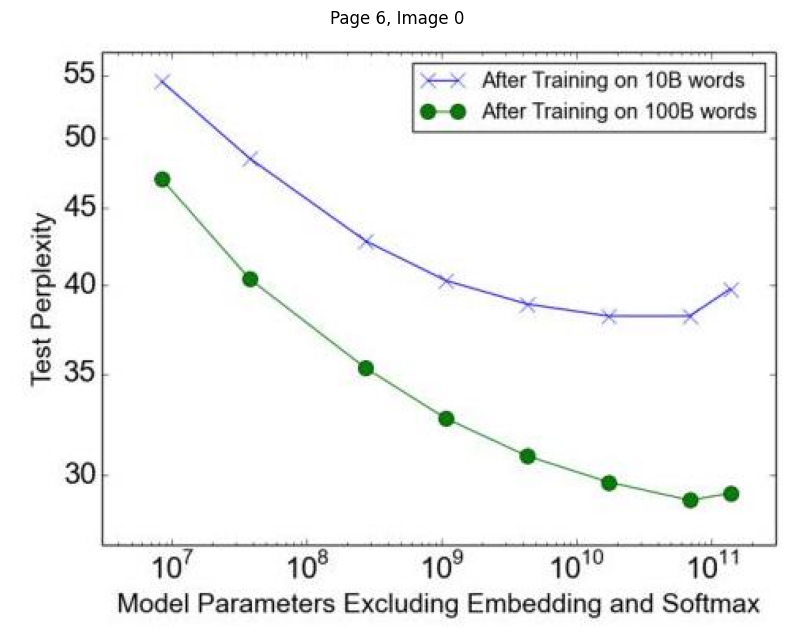

Displayed image from Page 6, Image 0


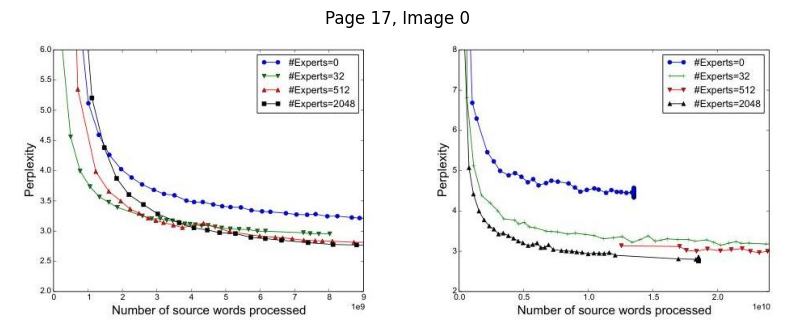

Displayed image from Page 17, Image 0


In [ ]:
#Extract the embedded images
import json
import base64
from PIL import Image
import io
import matplotlib.pyplot as plt

def extract_and_display_images_from_ocr_json(json_file):
    # Load JSON data
    with open(json_file, 'r') as f:
        data = json.load(f)

    # Iterate through pages
    for page in data.get('pages', []):
        page_index = page.get('index', 'Unknown')

        # Iterate through images in each page
        for img_index, img_data in enumerate(page.get('images', [])):
            if 'image_base64' in img_data:
                # Extract base64 data
                img_base64 = img_data['image_base64']

                # Remove header if present
                if ',' in img_base64:
                    img_base64 = img_base64.split(',', 1)[1]

                # Decode base64 to image
                img_bytes = base64.b64decode(img_base64)
                img = Image.open(io.BytesIO(img_bytes))

                # Display image using matplotlib
                plt.figure(figsize=(10, 8))
                plt.imshow(img)
                plt.title(f"Page {page_index}, Image {img_index}")
                plt.axis('off')
                plt.show()

                print(f"Displayed image from Page {page_index}, Image {img_index}")

# Usage
extract_and_display_images_from_ocr_json('ocr_results.json')

In [4]:
import json

def create_structured_data(ocr_json):
    structured_data = {
        "Document": {
            "Metadata": {
                "Title": ocr_json.get("title", "..."),
                "Authors": ocr_json.get("authors", ["..."]),
                "Sections": [],
                "Images": [],
                "Formulas": []
            }
        }
    }

    section_id = 1
    paragraph_id = 1
    image_id = 1
    formula_id = 1

    for page in ocr_json["pages"]:
        current_section = None
        for line in page["markdown"].split('\n'):
            if line.startswith('#'):
                level = line.count('#')
                title = line.strip('#').strip()
                current_section = {
                    "Section_ID": f"Sec{section_id}",
                    "Title": title,
                    "Level": level,
                    "Paragraphs": [],
                    "Subsections": []
                }
                structured_data["Document"]["Metadata"]["Sections"].append(current_section)
                section_id += 1
            elif line.strip():
                if current_section:
                    current_section["Paragraphs"].append({
                        "Para_ID": f"P{paragraph_id}",
                        "Text": line,
                        "Type": "BodyText",
                        "Formulas": [],
                        "Images": [],
                        "Parent": current_section["Section_ID"]
                    })
                    paragraph_id += 1

        for image in page["images"]:
            structured_data["Document"]["Metadata"]["Images"].append({
                "Image_ID": f"Fig{image_id}",
                "Type": "Diagram/Photo/Chart",
                "Caption": "...",
                "Linked_Paras": []
            })
            image_id += 1

    return structured_data

# Load the OCR JSON data
with open('ocr_results.json', 'r') as file:
    ocr_data = json.load(file)

# Create the structured data
result = create_structured_data(ocr_data)

# Save the structured data to a new JSON file
with open('structured_ocr_results.json', 'w') as file:
    json.dump(result, file, indent=2)

print("Structured data has been created and saved to 'structured_ocr_results.json'")


Structured data has been created and saved to 'structured_ocr_results.json'


In [ ]:
# !pip install pix2tex

  Using cached pix2tex-0.1.4-py3-none-any.whl.metadata (11 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 427.0/427.0 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.5/431.5 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.9/274.9 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 89.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 73.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 M

In [ ]:
# import json
# from PIL import Image
# from pix2tex.cli import LatexOCR
# from io import BytesIO
# import base64

# def process_formulas(page_content, images, formula_id_counter):
#     """Process text and images to detect formulas using LatexOCR"""
#     formulas = []
#     img_model = LatexOCR()

#     # Process inline formulas in text
#     text_formulas = []
#     paragraphs = page_content.split('\n')
#     for para in paragraphs:
#         if any(c in para for c in {'\\', '^', '_', '{', '}'}):
#             try:
#                 formula = img_model.predict(para)
#                 text_formulas.append({
#                     "text": para,
#                     "latex": formula
#                 })
#             except:
#                 pass

#     # Process formula images
#     img_formulas = []
#     for img_data in images:
#         try:
#             img = Image.open(BytesIO(base64.b64decode(img_data["content"])))
#             formula = img_model(img)
#             img_formulas.append({
#                 "image_id": img_data["id"],
#                 "latex": formula
#             })
#         except:
#             pass

#     return text_formulas, img_formulas

# def create_structured_data(ocr_json):
#     structured_data = {
#         "Document": {
#             "Metadata": {
#                 "Title": ocr_json.get("title", "..."),
#                 "Authors": ocr_json.get("authors", ["..."]),
#                 "Sections": [],
#                 "Images": [],
#                 "Formulas": []
#             }
#         }
#     }

#     section_id = 1
#     paragraph_id = 1
#     formula_id = 1
#     image_id = 1

#     for page in ocr_json["pages"]:
#         current_section = None
#         page_content = page["markdown"]
#         images = page.get("images", [])

#         # Detect formulas using ML model
#         text_formulas, img_formulas = process_formulas(page_content, images, formula_id)

#         # Process sections and paragraphs
#         lines = page_content.split('\n')
#         for line in lines:
#             if line.startswith('#'):
#                 level = line.count('#')
#                 title = line.strip('#').strip()
#                 current_section = {
#                     "Section_ID": f"Sec{section_id}",
#                     "Title": title,
#                     "Level": level,
#                     "Paragraphs": [],
#                     "Subsections": []
#                 }
#                 structured_data["Document"]["Metadata"]["Sections"].append(current_section)
#                 section_id += 1
#             elif line.strip():
#                 if current_section:
#                     para = {
#                         "Para_ID": f"P{paragraph_id}",
#                         "Text": line,
#                         "Type": "BodyText",
#                         "Formulas": [],
#                         "Images": [],
#                         "Parent": current_section["Section_ID"]
#                     }

#                     # Link text formulas
#                     for formula in text_formulas:
#                         if formula["text"] in line:
#                             structured_data["Document"]["Metadata"]["Formulas"].append({
#                                 "Formula_ID": f"Eq{formula_id}",
#                                 "LaTeX": formula["latex"],
#                                 "Context": line[:50] + "...",
#                                 "Linked_Paras": [para["Para_ID"]]
#                             })
#                             para["Formulas"].append(f"Eq{formula_id}")
#                             formula_id += 1

#                     current_section["Paragraphs"].append(para)
#                     paragraph_id += 1

#         # Process images and image formulas
#         for img_data, formula in zip(images, img_formulas):
#             structured_data["Document"]["Metadata"]["Images"].append({
#                 "Image_ID": f"Fig{image_id}",
#                 "Type": "Formula" if formula else "Diagram",
#                 "Caption": formula["latex"] if formula else "...",
#                 "Linked_Paras": []
#             })
#             if formula:
#                 structured_data["Document"]["Metadata"]["Formulas"].append({
#                     "Formula_ID": f"Eq{formula_id}",
#                     "LaTeX": formula["latex"],
#                     "Context": "Image-based formula",
#                     "Linked_Paras": []
#                 })
#                 formula_id += 1
#             image_id += 1

#     return structured_data

# # Load OCR data and process
# with open('ocr_results.json') as f:
#     ocr_data = json.load(f)

# result = create_structured_data(ocr_data)

# with open('structured_output.json', 'w') as f:
#     json.dump(result, f, indent=2)


In [ ]:
# import json
# import re

# def extract_latex_formulas(ocr_json):
#     formulas = []

#     for page in ocr_json['pages']:
#         markdown_content = page['markdown']

#         # Find all LaTeX formulas enclosed in double dollar signs
#         latex_matches = re.findall(r'\$\$(.*?)\$\$', markdown_content, re.DOTALL)

#         for formula in latex_matches:
#             formulas.append(formula.strip())

#     return formulas

# # Load the OCR JSON data
# with open('ocr_results.json', 'r') as file:
#     ocr_data = json.load(file)

# # Extract LaTeX formulas
# latex_formulas = extract_latex_formulas(ocr_data)

# # Print the extracted formulas
# for i, formula in enumerate(latex_formulas, 1):
#     print(f"Formula {i}: {formula}")

Formula 1: y=\sum_{i=1}^{n} G(x)_{i} E_{i}(x)
Formula 2: G_{\sigma}(x)=\operatorname{Softmax}\left(x \cdot W_{g}\right)
Formula 3: \begin{gathered}
G(x)=\operatorname{Softmax}(\operatorname{KeepTop} K(H(x), k)) \\
H(x)_{i}=\left(x \cdot W_{g}\right)_{i}+\operatorname{StandardNormal}() \cdot \operatorname{Softplus}\left(\left(x \cdot W_{\text {noise }}\right)_{i}\right) \\
\operatorname{KeepTop} K(v, k)_{i}= \begin{cases}v_{i} & \text { if } v_{i} \text { is in the top } k \text { elements of } v . \\
-\infty & \text { otherwise. }\end{cases}
\end{gathered}
Formula 4: \begin{gathered}
\text { Importance }(X)=\sum_{x \in X} G(x) \\
L_{\text {importance }}(X)=w_{\text {importance }} \cdot C V(\text { Importance }(X))^{2}
\end{gathered}
Formula 5: \begin{aligned}
P(x, i)=\operatorname{Pr}\left(\left(x \cdot W_{g}\right)_{i}+\right. & \left.+\operatorname{StandardNormal}() \cdot \operatorname{Softplus}\left(\left(x \cdot W_{\text {noise }}\right)_{i}\right)\right. \\
& >k \operatorname{th} 

In [ ]:
# import json
# import re

# def enhanced_extract_formulas(text):
#     """Improved formula extraction handling both inline and display math"""
#     latex_pattern = re.compile(r'(\$\$.*?\$\$|\$.*?\$)', re.DOTALL)
#     return [match.strip() for match in latex_pattern.findall(text)]

# def create_enhanced_structure(ocr_json):
#     """Create structured data with integrated formula detection"""
#     structured_data = {
#         "Document": {
#             "Metadata": {
#                 "Title": "OUTRAGEOUSLY LARGE NEURAL NETWORKS: The Sparsely-Gated Mixture-of-Experts Layer",
#                 "Authors": ["Noam Shazeer", "Azalia Mirhoseini", "Krzysztof Maziarz",
#                            "Andy Davis", "Quoc Le", "Geoffrey Hinton", "Jeff Dean"],
#                 "Sections": [],
#                 "Images": [],
#                 "Formulas": []
#             }
#         }
#     }

#     seen_formulas = set()
#     section_id = 1
#     image_id = 1
#     current_section = None
#     formula_counter = 1

#     for page in ocr_json["pages"]:
#         # Process content
#         content_blocks = re.split(r'\n\s*\n', page["markdown"])  # Split by empty lines
#         for block in content_blocks:
#             if block.startswith('#'):
#                 # Section heading
#                 level = block.count('#')
#                 title = block.strip('#').strip()
#                 current_section = {
#                     "Section_ID": f"Sec{section_id}",
#                     "Title": title,
#                     "Level": level,
#                     "Paragraphs": [],
#                     "Subsections": []
#                 }
#                 structured_data["Document"]["Metadata"]["Sections"].append(current_section)
#                 section_id += 1
#             elif block.strip():
#                 # Paragraph with formulas
#                 formulas = enhanced_extract_formulas(block)
#                 para_id = f"P{len(structured_data['Document']['Metadata']['Sections'])*100 + len(current_section['Paragraphs'])}"

#                 # Track unique formulas
#                 for formula in formulas:
#                     if formula not in seen_formulas:
#                         structured_data["Document"]["Metadata"]["Formulas"].append({
#                             "Formula_ID": f"F{formula_counter}",
#                             "Content": formula,
#                             "Type": "Display" if formula.startswith('$$') else "Inline"
#                         })
#                         seen_formulas.add(formula)
#                         formula_counter += 1

#                 # Add paragraph
#                 current_section["Paragraphs"].append({
#                     "Para_ID": para_id,
#                     "Text": re.sub(r'\$\$.*?\$\$|\$.*?\$', '[FORMULA]', block),  # Clean text
#                     "Formulas": [{"Ref_ID": f"F{i+1}"} for i in range(formula_counter-len(formulas), formula_counter)],
#                     "Images": [],
#                     "Parent": current_section["Section_ID"]
#                 })

#         # Process images
#         for img in page["images"]:
#             structured_data["Document"]["Metadata"]["Images"].append({
#                 "Image_ID": f"Fig{image_id}",
#                 "Caption": img.get("caption", "Mixture of Experts Architecture"),
#                 "Dimensions": page["dimensions"],
#                 "Linked_Paras": []
#             })
#             image_id += 1

#     return structured_data

# # Load and process data
# with open('ocr_results.json', 'r', encoding='utf-8') as f:
#     ocr_data = json.load(f)

# structured_output = create_enhanced_structure(ocr_data)

# # Save results
# with open('enhanced_structured_output.json', 'w') as f:
#     json.dump(structured_output, f, indent=2)

# print("Structured output with formulas created successfully!")

Structured output with formulas created successfully!


In [5]:
import json

def combine_formulas(data):
    for section in data['Document']['Metadata']['Sections']:
        combined_formula = []
        in_formula = False
        new_paragraphs = []

        for paragraph in section['Paragraphs']:
            if paragraph['Text'].strip() == '$$':
                if in_formula:
                    # End of formula
                    new_paragraphs.append({
                        "Para_ID": f"P{len(new_paragraphs) + 1}",
                        "Text": "\n".join(combined_formula),
                        "Type": "Formula",
                        "Formulas": [],
                        "Images": [],
                        "Parent": section['Section_ID']
                    })
                    combined_formula = []
                in_formula = not in_formula
            elif in_formula:
                combined_formula.append(paragraph['Text'])
            else:
                new_paragraphs.append(paragraph)

        section['Paragraphs'] = new_paragraphs

    return data

# Load the JSON data
with open('/content/structured_ocr_results.json', 'r') as file:
    structured_data = json.load(file)

# Apply the function
modified_data = combine_formulas(structured_data)

# Save the modified JSON
with open('modified_structured_output.json', 'w') as file:
    json.dump(modified_data, file, indent=2)

print("JSON structure modified and saved.")
import json

def combine_formulas(data):
    for section in data['Document']['Metadata']['Sections']:
        combined_formula = []
        in_formula = False
        new_paragraphs = []

        for paragraph in section['Paragraphs']:
            if paragraph['Text'].strip() == '$$':
                if in_formula:
                    # End of formula
                    new_paragraphs.append({
                        "Para_ID": f"P{len(new_paragraphs) + 1}",
                        "Text": "\n".join(combined_formula),
                        "Type": "Formula",
                        "Formulas": [],
                        "Images": [],
                        "Parent": section['Section_ID']
                    })
                    combined_formula = []
                in_formula = not in_formula
            elif in_formula:
                combined_formula.append(paragraph['Text'])
            else:
                new_paragraphs.append(paragraph)

        section['Paragraphs'] = new_paragraphs

    return data

# Load the JSON data
with open('/content/structured_ocr_results.json', 'r') as file:
    structured_data = json.load(file)

# Apply the function
modified_data = combine_formulas(structured_data)

# Save the modified JSON
with open('modified_structured_output.json', 'w') as file:
    json.dump(modified_data, file, indent=2)

print("JSON structure modified and saved.")


JSON structure modified and saved.
JSON structure modified and saved.


In [6]:
import json

def add_parent_tags(sections, parent_id=None):
    for section in sections:
        if parent_id:
            section['Parent'] = parent_id

        if 'Subsections' in section:
            add_parent_tags(section['Subsections'], section['Section_ID'])

# Load the JSON data
with open('modified_structured_output.json', 'r') as file:
    structured_data = json.load(file)

# Add parent tags to sections and subsections
add_parent_tags(structured_data['Document']['Metadata']['Sections'])

# Save the modified JSON
with open('modified_structured_output_with_parents.json', 'w') as file:
    json.dump(structured_data, file, indent=2)

print("Modified JSON structure with parent tags has been saved.")


Modified JSON structure with parent tags has been saved.


In [12]:
import os
from mistralai import Mistral

# # Retrieve the API key from environment variables
# api_key = os.environ["MISTRAL_API_KEY"]

# Specify model
model = "mistral-small-latest"

# Initialize the Mistral client
client = Mistral(api_key=api_key)

# Define the messages for the chat
messages = [
    {
        "role": "user",
        "content": [
            {
                "type": "text",
                "text": "Analyze this research paper and provide a comprehensive list of prerequisite topics and existing knowledge areas that a researcher or student should be familiar with to fully understand the concepts presented, follow the order of the paper top to bottom"
            },
            {
                "type": "document_url",
                "document_url": "https://dl.acm.org/doi/pdf/10.1145/3649329.3658473"
            }
        ]
    }
]

# Get the chat response
chat_response = client.chat.complete(
    model=model,
    messages=messages
)

# Print the content of the response
print(chat_response.choices[0].message.content)

# Output:
# The last sentence in the document is:\n\n\"Zaremba, W., Sutskever, I., and Vinyals, O. Recurrent neural network regularization. arXiv:1409.2329, 2014.

SDKError: API error occurred: Status 400
{"object":"error","message":"An error happened when fetching file from url https://dl.acm.org/doi/pdf/10.1145/3649329.3658473","type":"invalid_file","param":null,"code":"1901"}